In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch

from datasets import load_dataset
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from transformers import AutoModel, AutoTokenizer
from umap.umap_ import UMAP

#system call
os.system("")

# importing local modules
import config
import utils

/home/karvsmech/PycharmProjects/Pytorch_projects/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/karvsmech/PycharmProjects/Pytorch_projects/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/karvsmech/PycharmProjects/

0

In [4]:
# assigning a device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# selecting a transformer model
model_ckpt = 'distilbert-base-uncased'

# initializing AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# initializing transformer AutoModels
model = AutoModel.from_pretrained(model_ckpt).to(device)
print(f'the available device is: {device}')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


the available device is: cuda


In [5]:
# load emotion dataset
emotions = load_dataset('emotion')

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
print(utils.Style.GREEN + 'printing emotions' + utils.Style.RESET)
print(emotions)

print(utils.Style.GREEN + '\nprinting the type of emotions dataset' + utils.Style.RESET)
print(type(emotions))

printing emotions
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

printing the type of emotions dataset
<class 'datasets.dataset_dict.DatasetDict'>


In [7]:
print(utils.Style.GREEN + 'printing emotions train' + utils.Style.RESET)
print(emotions['train'])

print(utils.Style.GREEN + '\nprinting the type of emotions train' + utils.Style.RESET)
print(type(emotions['train']))

printing emotions train
Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

printing the type of emotions train
<class 'datasets.arrow_dataset.Dataset'>


In [8]:
print(utils.Style.GREEN + 'column names of the emotion dataset' + utils.Style.RESET)
emotions.column_names

print(utils.Style.GREEN + '\naccessing the text column' + utils.Style.RESET)
emotions['train']['text'][:2]

print(utils.Style.GREEN + '\ndatatype of the text column' + utils.Style.RESET)
type(emotions['train']['text'][:2]) # it becomes a plain list

print(utils.Style.GREEN + '\naccessing the label column' + utils.Style.RESET)
emotions['train']['label'][:2]

print(utils.Style.GREEN + '\ndatatype of the label column' + utils.Style.RESET)
type(emotions['train']['label'][:2]) # it becomes a plain list

column names of the emotion dataset


{'train': ['text', 'label'],
 'validation': ['text', 'label'],
 'test': ['text', 'label']}


accessing the text column


['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']


datatype of the text column


list


accessing the label column


[0, 0]


datatype of the label column


list

In [9]:
emotions.set_format('torch', columns=['text', 'label'])

print(utils.Style.GREEN + 'accessing the text column' + utils.Style.RESET)
emotions['train']['text'][:2]

print(utils.Style.GREEN + '\ndatatype of the text column' + utils.Style.RESET)
type(emotions['train']['text'][:2]) # text can't be converted to a tensor. it stays as plain list

print(utils.Style.GREEN + '\naccessing the label column' + utils.Style.RESET)
emotions['train']['label'][:2]

print(utils.Style.GREEN + '\ndatatype of the label column' + utils.Style.RESET)
type(emotions['train']['label'][:2]) # list becomes a tensor

accessing the text column


['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']


datatype of the text column


list


accessing the label column


tensor([0, 0])


datatype of the label column


torch.Tensor

In [10]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [11]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

print(utils.Style.GREEN + 'printing emotions_encoded' + utils.Style.RESET)
emotions_encoded

print(utils.Style.GREEN + '\nprinting emotions_encoded column names' + utils.Style.RESET)
emotions_encoded.column_names

print(utils.Style.GREEN + 'accessing the text column' + utils.Style.RESET)
emotions_encoded['train']['text'][:2]

print(utils.Style.GREEN + '\ndatatype of the text column' + utils.Style.RESET)
type(emotions_encoded['train']['text'][:2]) # text can't be converted to a tensor. it stays as plain list

print(utils.Style.GREEN + '\naccessing the label column' + utils.Style.RESET)
emotions_encoded['train']['label'][:2]

print(utils.Style.GREEN + '\ndatatype of the label column' + utils.Style.RESET)
type(emotions_encoded['train']['label'][:2])

print(utils.Style.GREEN + '\naccessing the input_ids column' + utils.Style.RESET)
emotions_encoded['train']['input_ids'][:2]

print(utils.Style.GREEN + '\ndatatype of the input_ids column' + utils.Style.RESET)
type(emotions_encoded['train']['input_ids'][:2]) # text can't be converted to a tensor. it stays as plain list

print(utils.Style.GREEN + '\naccessing the attention_mask column' + utils.Style.RESET)
emotions_encoded['train']['attention_mask'][:2]

print(utils.Style.GREEN + '\ndatatype of the attention_mask column' + utils.Style.RESET)
type(emotions_encoded['train']['attention_mask'][:2])

Loading cached processed dataset at /home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-d385021a8c0bb3a0.arrow
Loading cached processed dataset at /home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-83457ba7a585dbf4.arrow
Loading cached processed dataset at /home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-1b486cc7f8695f03.arrow


printing emotions_encoded


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})


printing emotions_encoded column names


{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

accessing the text column


['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']


datatype of the text column


list


accessing the label column


tensor([0, 0])


datatype of the label column


torch.Tensor


accessing the input_ids column


tensor([[  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  1045,  2064,  2175,  2013,  3110,  2061, 20625,  2000,  2061,
          9636, 17772,  2074,  2013,  2108,  2105,  2619,  2040, 14977,  1998,
          2003,  8300,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0, 


datatype of the input_ids column


torch.Tensor


accessing the attention_mask column


tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


datatype of the attention_mask column


torch.Tensor

In [12]:
print(utils.Style.GREEN + 'the columns the model expects as an input' + utils.Style.RESET)
tokenizer.model_input_names # text and label are not required by the model?
# here the model is a masked language model and it has no use for targets.
# we are only trying to use the last hidden state produced by 'distilbert-base-uncased' model for the input data, as features for the classification task.
# we are essentially trying to build a classification head on a 'distilbert-base-uncased' model body with weights unchanged.

the columns the model expects as an input


['input_ids', 'attention_mask']

In [13]:
# retrieving the hidden state for the entire dataset.
def extract_hidden_states(batch):
    # place model inputs on the device GPU if available or CPU
    inputs_ = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs_).last_hidden_state

    # return vector for CLS token as is common in text classification tasks
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [14]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Loading cached processed dataset at /home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-9d38a345b021ce9c.arrow
Loading cached processed dataset at /home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-39af3126f09133b6.arrow
Loading cached processed dataset at /home/karvsmech/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-74011e52e758b2db.arrow


In [15]:
# a column called hidden_state has been added to the dataset dict
emotions_hidden.column_names
emotions_hidden['train']['hidden_state']

{'train': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
 'validation': ['text',
  'label',
  'input_ids',
  'attention_mask',
  'hidden_state'],
 'test': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']}

tensor([[-0.1168,  0.0986, -0.1296,  ...,  0.0587,  0.3543,  0.4042],
        [-0.0324, -0.0323, -0.1957,  ..., -0.1747,  0.3546,  0.3028],
        [ 0.0397,  0.2022,  0.1423,  ..., -0.1141,  0.3394,  0.3958],
        ...,
        [-0.0034, -0.0959,  0.0584,  ..., -0.0427,  0.2496,  0.3076],
        [ 0.0666,  0.1733,  0.1290,  ...,  0.0612,  0.2904,  0.4684],
        [ 0.0167,  0.1013, -0.0073,  ..., -0.0649,  0.3454,  0.2199]])

In [16]:
# creating a feature matrix

X_train = np.array(emotions_hidden['train']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_test = np.array(emotions_hidden['test']['hidden_state'])
y_test = np.array(emotions_hidden['test']['label'])

print(utils.Style.GREEN + 'the shape of the X train' + utils.Style.RESET)
X_train.shape

print(utils.Style.GREEN + '\nthe shape of the X valid' + utils.Style.RESET)
X_valid.shape

print(utils.Style.GREEN + '\nthe shape of the X test' + utils.Style.RESET)
X_test.shape

the shape of the X train


(16000, 768)


the shape of the X valid


(2000, 768)


the shape of the X test


(2000, 768)

In [17]:
# does the training dataset have a meaningful representation of the emotions we want to classify.
# visualizing the training set
# For visualization purposes, we will use the powerful UMAP algorithm to project the 768 dimensional vectors down to 2D (2 dimensions).
# however UMAP works best when the features are scaled between [0, 1] interval, so we will use MinMaxScaler.

# scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
X_scaled[:5, :5]
print(f'shape of the minmax scaled array is: {X_scaled.shape}')

# initialize and fit UMAP
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

# create a dataframe of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

array([[0.36425388, 0.58609843, 0.3973004 , 0.6805492 , 0.4113561 ],
       [0.45346388, 0.45611912, 0.33501166, 0.38582903, 0.55069274],
       [0.5296934 , 0.68904227, 0.65353525, 0.6148025 , 0.5721541 ],
       [0.45336205, 0.6110436 , 0.61392367, 0.43804124, 0.80194104],
       [0.4733871 , 0.6776196 , 0.5748154 , 0.4748485 , 0.56347895]],
      dtype=float32)

shape of the minmax scaled array is: (16000, 768)


,X,Y,label
0,4.349923,5.999717,0
1,-2.934030,5.656658,0
2,5.200218,2.503464,3
3,-2.391295,3.016159,2
4,-3.127358,3.692950,3


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<Axes: ylabel='label_name'>

Text(0.5, 1.0, 'frequency of classes')

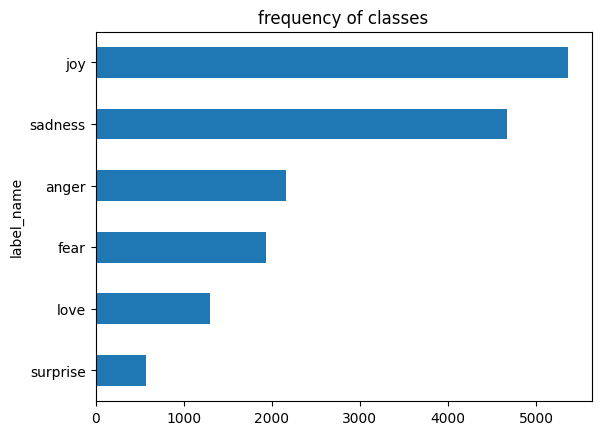

In [18]:
# from datasets to dataframes
# changing the hugging face dataset to a pandas dataframe
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)


df['label_name'] = df['label'].apply(label_int2str)

# looking at the class distribution
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('frequency of classes')
plt.show()

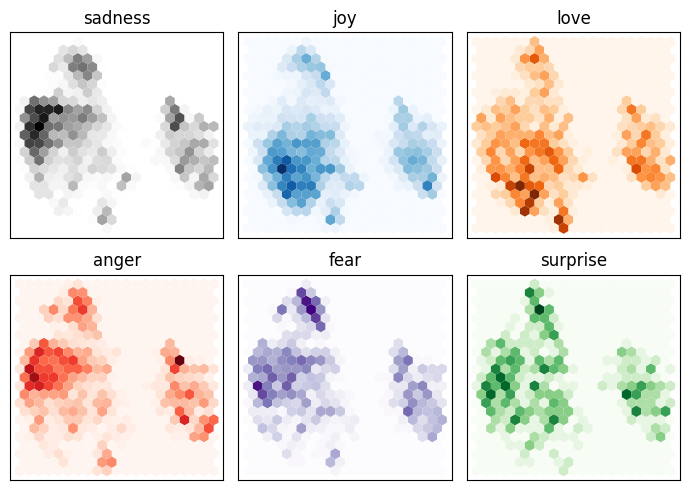

In [19]:
utils.draw_density_plot(df_emb, config.cmaps, config.labels)

In [20]:
# implementing a simple classifier using logistic regression.
# this logistic regression will use the last hidden states of the "distilbert-base-uncased" model as its features.

# we increase 'max_iter' to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
print(lr_clf.score(X_valid, y_valid))

LogisticRegression(max_iter=3000)

0.633


In [21]:
# creating a baseline model with simple heuristics
# this baseline model will be compared against our logistic regression model
# to see if our model is any good.

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
print(dummy_clf.score(X_valid, y_valid))

DummyClassifier(strategy='most_frequent')

0.352


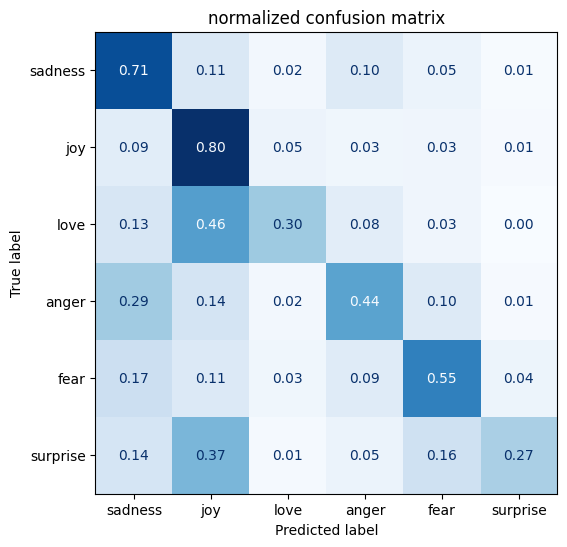

In [22]:
y_pred = lr_clf.predict(X_valid)
utils.plot_confusion_matrix(y_pred, y_valid, config.labels)